In [1]:
import keras

Using TensorFlow backend.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import re
import csv

In [10]:
from keras.models import Model


In [11]:
import pydot

In [229]:
from numpy import loadtxt
from keras.models import load_model

In [235]:
best_model = load_model('bnn_model.h5')

X = thindataset[:,1:3027]
y = thindataset[:,0]
# evaluate the model
score = best_model.evaluate(X, y, verbose=2)
score

[0.029439800266181055, 0.1391800194978714]

In [236]:
best_model

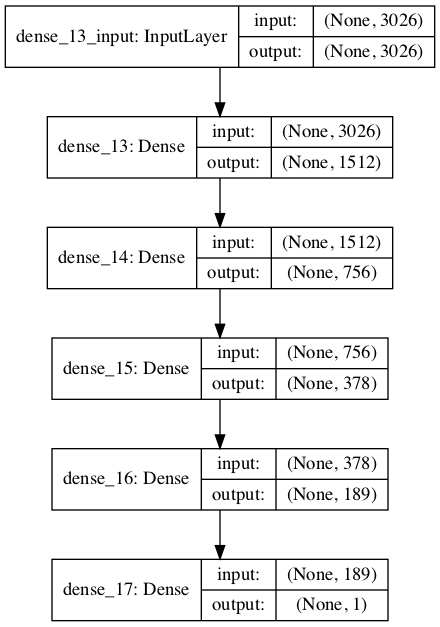

In [237]:
from keras.utils import plot_model
plot_model(best_model,expand_nested=True,show_shapes=True)

In [238]:
best_model.evaluate(X_test, y_test)

2596/2596 [==============================] - 1s 482us/step


[0.02951951426538554, 0.13135592639446259]

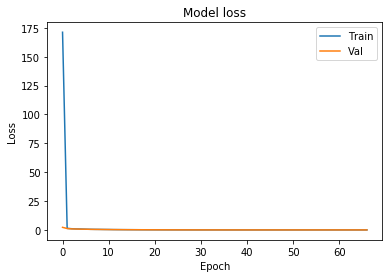

In [246]:
plt.plot(nnmodel.history.history['loss'])
plt.plot(nnmodel.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


In [247]:
predictions = best_model.predict(X, batch_size=None, verbose=2, steps=None, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False)

In [248]:
predictions.shape

(12976, 1)

In [249]:
pred = pd.DataFrame(predictions)

In [250]:
pred.head()

,0
0,0.709059
1,0.685298
2,0.678086
3,0.750390
4,0.686588


In [276]:
actuals = thin['percentage_grade']

In [277]:
actual = pd.DataFrame(actuals)

In [279]:
actual.head()

,percentage_grade
0,0.666667
1,0.750000
2,0.583333
3,0.833333
4,0.666667


In [257]:
thin.head()

,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0.666667,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750000,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.583333,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [275]:
thin = thin.drop(['Unnamed: 0'], axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [280]:
actual.columns = ['Actual Test Score']

In [259]:
pred.columns = ['Predicted Test Score']

In [281]:
actual.head()

,Actual Test Score
0,0.666667
1,0.750000
2,0.583333
3,0.833333
4,0.666667


In [282]:
AvP = actual.join(pred)

In [283]:
AvP.head(15)

,Actual Test Score,Predicted Test Score
0,0.666667,0.709059
1,0.750000,0.685298
2,0.583333,0.678086
3,0.833333,0.750390
4,0.666667,0.686588
5,0.666667,0.705572
6,0.833333,0.751657
7,0.833333,0.759297
8,0.750000,0.738985
9,0.750000,0.654166


In [284]:
AvP['Score Diff']=AvP['Predicted Test Score'] - AvP['Actual Test Score']

In [285]:
AvP.head(15)

,Actual Test Score,Predicted Test Score,Score Diff
0,0.666667,0.709059,0.042392
1,0.750000,0.685298,-0.064702
2,0.583333,0.678086,0.094753
3,0.833333,0.750390,-0.082943
4,0.666667,0.686588,0.019921
5,0.666667,0.705572,0.038905
6,0.833333,0.751657,-0.081676
7,0.833333,0.759297,-0.074036
8,0.750000,0.738985,-0.011015
9,0.750000,0.654166,-0.095834


In [301]:
score_bins = [-1, .59, .69, .79, .89, 1.1]
letter_grades = ['F','D','C','B','A']

In [302]:
act_letter_cats = pd.cut(AvP['Actual Test Score'], score_bins, labels=letter_grades)

In [303]:
pred_letter_cats = pd.cut(AvP['Predicted Test Score'], score_bins, labels=letter_grades)

In [304]:
AvP['Actual Grade'] = act_letter_cats

In [305]:
AvP['Predicted Grade'] = pred_letter_cats

In [321]:
AvP.columns

Index(['Actual Test Score', 'Predicted Test Score', 'Score Diff',
       'Actual Grade', 'Predicted Grade'],
      dtype='object')

In [329]:
AvP.head()

,Actual Test Score,Predicted Test Score,Score Diff,Actual Grade,Predicted Grade
0,0.666667,0.709059,0.042392,D,C
1,0.750000,0.685298,-0.064702,C,D
2,0.583333,0.678086,0.094753,F,D
3,0.833333,0.750390,-0.082943,B,C
4,0.666667,0.686588,0.019921,D,D


In [342]:
grades = AvP.sort_values(by=['Score Diff'], ascending=False)

In [361]:
grades1 = grades[5000:9000]

In [368]:
grades1.head()

,Actual Test Score,Predicted Test Score,Score Diff,Actual Grade,Predicted Grade
10045,0.750000,0.794408,0.044408,C,B
9635,0.500000,0.544396,0.044396,F,F
2711,0.666667,0.711053,0.044386,D,C
12790,0.600000,0.644298,0.044298,D,D
9459,0.750000,0.794275,0.044275,C,B


In [362]:
essays_text = pd.read_csv('txt_only.csv')

In [364]:
essays_text = essays_text.drop(['Unnamed: 0'], axis=1)

In [365]:
essays_text.head()

,essay
0,"Dear local newspaper, I think effects computer..."
1,"Dear @CAPS1 @CAPS2, I believe that using compu..."
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl..."
3,"Dear Local Newspaper, @CAPS1 I have found that..."
4,"Dear @LOCATION1, I know having computers has a..."


In [366]:
txt_grades  = essays_text.join(AvP)

In [367]:
txt_grades.head()

,essay,Actual Test Score,Predicted Test Score,Score Diff,Actual Grade,Predicted Grade
0,"Dear local newspaper, I think effects computer...",0.666667,0.709059,0.042392,D,C
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",0.750000,0.685298,-0.064702,C,D
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",0.583333,0.678086,0.094753,F,D
3,"Dear Local Newspaper, @CAPS1 I have found that...",0.833333,0.750390,-0.082943,B,C
4,"Dear @LOCATION1, I know having computers has a...",0.666667,0.686588,0.019921,D,D


In [369]:
tgrades = txt_grades.sort_values(by=['Score Diff'], ascending=False)

In [370]:
SL_grades = tgrades[5000:9000]

In [394]:
SL_grades.head(1000
              )

,essay,Actual Test Score,Predicted Test Score,Score Diff,Actual Grade,Predicted Grade
10045,"In the exerpt ""The Mooring Mast"" by @ORGANIZAT...",0.750000,0.794408,0.044408,C,B
9635,Based ON this excerpt the builders faced A few...,0.500000,0.544396,0.044396,F,F
2711,No Censorship Do you enjoy reading interes...,0.666667,0.711053,0.044386,D,C
12790,I think laughter is good for a relationships a...,0.600000,0.644298,0.044298,D,D
9459,"In the excerpt ""The Mooring Mast"", by @PERSON1...",0.750000,0.794275,0.044275,C,B
8181,The author creates a very warm happy welcoming...,0.500000,0.544250,0.044250,F,F
11124,I am writing a story about a time that I was p...,0.708333,0.752570,0.044237,C,C
3530,Censorship in libraries is a big argument toda...,0.666667,0.710885,0.044218,D,C
11018,One day a man named @PERSON1 had a doctorís ap...,0.708333,0.752535,0.044201,C,C
1835,"Books, music, movies, magazines, and more are ...",0.666667,0.710842,0.044175,D,C


In [380]:
SL_grades.to_csv('SLgrades.csv')

In [388]:
Sl_grades = SL_grades.rename(columns = {'Unnamed: 0':'Essay Number'}, inplace = True) 

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [391]:
SL_grades.columns

Index(['essay', 'Actual Test Score', 'Predicted Test Score', 'Score Diff',
       'Actual Grade', 'Predicted Grade'],
      dtype='object')

In [390]:
SL_grades.to_csv('SLgrades1.csv')

In [378]:
row = SL_grades.iloc[3355,:]

In [379]:
row

essay                   The mood created by Narciso Rodriguez has a lo...
Actual Test Score                                                     0.5
Predicted Test Score                                             0.452477
Score Diff                                                     -0.0475227
Actual Grade                                                            F
Predicted Grade                                                         F
Name: 7820, dtype: object

In [130]:
thin.head()

,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0.666667,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750000,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.583333,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
thin['percentage_grade'] = AvP['Actual Grade']

In [136]:
thin.to_csv('letter_grade_df.csv')

In [133]:
thin.head()

,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,D+,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,F,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,B,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,D+,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
thinDF = pd.read_csv('thin_essay_data.csv')

In [182]:
thinDF.head()

,Unnamed: 0,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,102,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0,0.666667,157,338,44,4.550296,4,37,30.727273,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.750000,175,419,42,4.463007,10,33,22.052632,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.583333,129,279,27,4.526882,7,23,18.600000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.833333,207,524,78,5.041985,40,46,21.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.666667,211,465,47,4.526882,4,45,15.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
thinDF = thinDF.drop(['Unnamed: 0'], axis=1)

In [184]:
thinDF.head()

,percentage_grade,stopwords,word_count,MISSPELLINGS,avg_word,PropNouns,punct,words_per_sent,102,12,...,ìthe,ìthen,ìthere,ìthis,ìtownî,ìwhen,ìwide,ìwinter,ìyou,íí
0,0.666667,157,338,44,4.550296,4,37,30.727273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.750000,175,419,42,4.463007,10,33,22.052632,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.583333,129,279,27,4.526882,7,23,18.600000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.833333,207,524,78,5.041985,40,46,21.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.666667,211,465,47,4.526882,4,45,15.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
thindataset = thinDF.values

In [199]:
thindataset

array([[6.66666667e-01, 1.57000000e+02, 3.38000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.50000000e-01, 1.75000000e+02, 4.19000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.83333333e-01, 1.29000000e+02, 2.79000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [6.66666667e-01, 3.60000000e+02, 8.17000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.66666667e-01, 2.41000000e+02, 5.63000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.66666667e-01, 1.98000000e+02, 4.67000000e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [168]:
best_model.predict_generator(generator, steps=1, callbacks=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=0)

NameError: name 'generator' is not defined

In [52]:
from tensorflow.keras.utils import Sequence

In [106]:
score = best_model.evaluate(X, y, verbose=2)
print("%s: %.2f%%" % (best_model.metrics_names, score*100))

['loss']: 2.95%


In [226]:
from keras_tqdm import TQDMNotebookCallback
from keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [EarlyStopping(monitor='val_loss', patience=10),
            ModelCheckpoint(filepath='bnn_model.h5', monitor='val_loss', save_best_only=True),TQDMNotebookCallback()]

In [214]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [215]:
nnmodel = Sequential()
nnmodel.add(Dense(1512, input_dim=3026, kernel_initializer='normal',activation='relu', kernel_regularizer=regularizers.l2(0.1)))
nnmodel.add(Dense(756, kernel_initializer='normal', activation='relu'))
nnmodel.add(Dense(378, kernel_initializer='normal', activation='relu'))
nnmodel.add(Dense(189, kernel_initializer='normal', activation='relu'))
nnmodel.add(Dense(1, kernel_initializer='normal', activation='linear'))

In [216]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import *
from keras.layers import LeakyReLU

In [217]:
from keras import initializers
from keras import regularizers
from keras import constraints

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
nnmodel.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [220]:
thindataset.shape

(12976, 3027)

In [221]:
X = thindataset[:,1:3027]
y = thindataset[:,0]

In [222]:
X.shape

(12976, 3026)

In [223]:
y.shape

(12976,)

In [224]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=33)

In [227]:
nnmodel.fit(X_train,y_train, epochs=82, batch_size=47, validation_data=(X_test, y_test),verbose=2, callbacks=callbacks)

Train on 10380 samples, validate on 2596 samples


Epoch 1/82


 - 15s - loss: 171.2092 - accuracy: 0.0845 - val_loss: 2.2572 - val_accuracy: 0.1314
Epoch 2/82


 - 16s - loss: 1.3815 - accuracy: 0.1125 - val_loss: 1.2445 - val_accuracy: 0.0401
Epoch 3/82


 - 17s - loss: 1.0548 - accuracy: 0.1214 - val_loss: 0.9031 - val_accuracy: 0.1252
Epoch 4/82


 - 18s - loss: 0.8841 - accuracy: 0.1260 - val_loss: 0.8108 - val_accuracy: 0.1321
Epoch 5/82


 - 17s - loss: 0.8114 - accuracy: 0.1205 - val_loss: 0.6901 - val_accuracy: 0.1244
Epoch 6/82


 - 17s - loss: 0.6690 - accuracy: 0.1343 - val_loss: 0.6589 - val_accuracy: 0.1317
Epoch 7/82


 - 17s - loss: 0.5751 - accuracy: 0.1378 - val_loss: 0.5310 - val_accuracy: 0.1317
Epoch 8/82


 - 16s - loss: 0.5116 - accuracy: 0.1372 - val_loss: 0.4733 - val_accuracy: 0.1317
Epoch 9/82


 - 15s - loss: 0.4795 - accuracy: 0.1303 - val_loss: 0.4397 - val_accuracy: 0.1325
Epoch 10/82


 - 15s - loss: 0.4245 - accuracy: 0.1347 - val_loss: 0.3893 - val_accuracy: 0.1275
Epoch 11/82


 - 15s - loss: 0.3934 - accuracy: 0.1292 - val_loss: 0.3424 - val_accuracy: 0.1325
Epoch 12/82


 - 15s - loss: 0.3270 - accuracy: 0.1409 - val_loss: 0.3075 - val_accuracy: 0.1314
Epoch 13/82


 - 16s - loss: 0.2957 - accuracy: 0.1405 - val_loss: 0.2858 - val_accuracy: 0.1306
Epoch 14/82


 - 16s - loss: 0.2659 - accuracy: 0.1406 - val_loss: 0.2507 - val_accuracy: 0.1321
Epoch 15/82


 - 16s - loss: 0.2420 - accuracy: 0.1405 - val_loss: 0.2270 - val_accuracy: 0.1325
Epoch 16/82


 - 18s - loss: 0.2210 - accuracy: 0.1410 - val_loss: 0.2051 - val_accuracy: 0.1314
Epoch 17/82


 - 16s - loss: 0.2010 - accuracy: 0.1404 - val_loss: 0.1861 - val_accuracy: 0.1314
Epoch 18/82


 - 17s - loss: 0.1781 - accuracy: 0.1410 - val_loss: 0.1732 - val_accuracy: 0.1314
Epoch 19/82


 - 17s - loss: 0.1622 - accuracy: 0.1405 - val_loss: 0.1545 - val_accuracy: 0.1314
Epoch 20/82


 - 17s - loss: 0.1481 - accuracy: 0.1410 - val_loss: 0.1395 - val_accuracy: 0.1314
Epoch 21/82


 - 16s - loss: 0.1350 - accuracy: 0.1406 - val_loss: 0.1262 - val_accuracy: 0.1310
Epoch 22/82


 - 16s - loss: 0.1221 - accuracy: 0.1406 - val_loss: 0.1151 - val_accuracy: 0.1310
Epoch 23/82


 - 16s - loss: 0.1110 - accuracy: 0.1410 - val_loss: 0.1093 - val_accuracy: 0.1310
Epoch 24/82


 - 16s - loss: 0.1007 - accuracy: 0.1410 - val_loss: 0.0954 - val_accuracy: 0.1314
Epoch 25/82


 - 16s - loss: 0.0917 - accuracy: 0.1412 - val_loss: 0.0871 - val_accuracy: 0.1310
Epoch 26/82


 - 16s - loss: 0.0834 - accuracy: 0.1410 - val_loss: 0.0806 - val_accuracy: 0.1317
Epoch 27/82


 - 16s - loss: 0.0758 - accuracy: 0.1412 - val_loss: 0.0726 - val_accuracy: 0.1314
Epoch 28/82


 - 17s - loss: 0.0686 - accuracy: 0.1411 - val_loss: 0.0651 - val_accuracy: 0.1325
Epoch 29/82


 - 17s - loss: 0.0632 - accuracy: 0.1410 - val_loss: 0.0608 - val_accuracy: 0.1314
Epoch 30/82


 - 16s - loss: 0.0571 - accuracy: 0.1411 - val_loss: 0.0552 - val_accuracy: 0.1321
Epoch 31/82


 - 14s - loss: 0.0522 - accuracy: 0.1408 - val_loss: 0.0497 - val_accuracy: 0.1314
Epoch 32/82


 - 15s - loss: 0.0485 - accuracy: 0.1413 - val_loss: 0.0461 - val_accuracy: 0.1314
Epoch 33/82


 - 15s - loss: 0.0452 - accuracy: 0.1410 - val_loss: 0.0441 - val_accuracy: 0.1314
Epoch 34/82


 - 15s - loss: 0.0422 - accuracy: 0.1409 - val_loss: 0.0422 - val_accuracy: 0.1314
Epoch 35/82


 - 15s - loss: 0.0395 - accuracy: 0.1412 - val_loss: 0.0381 - val_accuracy: 0.1321
Epoch 36/82


 - 16s - loss: 0.0372 - accuracy: 0.1412 - val_loss: 0.0362 - val_accuracy: 0.1314
Epoch 37/82


 - 16s - loss: 0.0355 - accuracy: 0.1410 - val_loss: 0.0351 - val_accuracy: 0.1325
Epoch 38/82


 - 16s - loss: 0.0341 - accuracy: 0.1408 - val_loss: 0.0327 - val_accuracy: 0.1317
Epoch 39/82


 - 17s - loss: 0.0331 - accuracy: 0.1408 - val_loss: 0.0333 - val_accuracy: 0.1321
Epoch 40/82


 - 16s - loss: 0.0322 - accuracy: 0.1408 - val_loss: 0.0312 - val_accuracy: 0.1314
Epoch 41/82


 - 16s - loss: 0.0320 - accuracy: 0.1415 - val_loss: 0.0321 - val_accuracy: 0.1298
Epoch 42/82


 - 15s - loss: 0.0312 - accuracy: 0.1410 - val_loss: 0.0318 - val_accuracy: 0.1306
Epoch 43/82


 - 15s - loss: 0.0311 - accuracy: 0.1410 - val_loss: 0.0298 - val_accuracy: 0.1314
Epoch 44/82


 - 15s - loss: 0.0311 - accuracy: 0.1414 - val_loss: 0.0303 - val_accuracy: 0.1325
Epoch 45/82


 - 15s - loss: 0.0306 - accuracy: 0.1409 - val_loss: 0.0308 - val_accuracy: 0.1325
Epoch 46/82


 - 15s - loss: 0.0306 - accuracy: 0.1410 - val_loss: 0.0335 - val_accuracy: 0.1306
Epoch 47/82


 - 15s - loss: 0.0307 - accuracy: 0.1407 - val_loss: 0.0308 - val_accuracy: 0.1321
Epoch 48/82


 - 15s - loss: 0.0310 - accuracy: 0.1405 - val_loss: 0.0309 - val_accuracy: 0.1321
Epoch 49/82


 - 15s - loss: 0.0305 - accuracy: 0.1410 - val_loss: 0.0296 - val_accuracy: 0.1314
Epoch 50/82


 - 15s - loss: 0.0308 - accuracy: 0.1408 - val_loss: 0.0298 - val_accuracy: 0.1317
Epoch 51/82


 - 15s - loss: 0.0303 - accuracy: 0.1410 - val_loss: 0.0313 - val_accuracy: 0.1310
Epoch 52/82


 - 16s - loss: 0.0305 - accuracy: 0.1413 - val_loss: 0.0298 - val_accuracy: 0.1310
Epoch 53/82


 - 16s - loss: 0.0303 - accuracy: 0.1412 - val_loss: 0.0333 - val_accuracy: 0.1321
Epoch 54/82


 - 16s - loss: 0.0308 - accuracy: 0.1407 - val_loss: 0.0296 - val_accuracy: 0.1321
Epoch 55/82


 - 16s - loss: 0.0305 - accuracy: 0.1409 - val_loss: 0.0303 - val_accuracy: 0.1317
Epoch 56/82


 - 16s - loss: 0.0308 - accuracy: 0.1409 - val_loss: 0.0319 - val_accuracy: 0.1314
Epoch 57/82


 - 15s - loss: 0.0306 - accuracy: 0.1412 - val_loss: 0.0295 - val_accuracy: 0.1314
Epoch 58/82


 - 17s - loss: 0.0305 - accuracy: 0.1409 - val_loss: 0.0321 - val_accuracy: 0.1321
Epoch 59/82


 - 16s - loss: 0.0309 - accuracy: 0.1407 - val_loss: 0.0335 - val_accuracy: 0.1321
Epoch 60/82


 - 15s - loss: 0.0304 - accuracy: 0.1408 - val_loss: 0.0331 - val_accuracy: 0.1306
Epoch 61/82


 - 15s - loss: 0.0310 - accuracy: 0.1409 - val_loss: 0.0299 - val_accuracy: 0.1317
Epoch 62/82


 - 15s - loss: 0.0303 - accuracy: 0.1408 - val_loss: 0.0297 - val_accuracy: 0.1314
Epoch 63/82


 - 15s - loss: 0.0306 - accuracy: 0.1406 - val_loss: 0.0299 - val_accuracy: 0.1314
Epoch 64/82


 - 15s - loss: 0.0306 - accuracy: 0.1407 - val_loss: 0.0300 - val_accuracy: 0.1310
Epoch 65/82


 - 15s - loss: 0.0303 - accuracy: 0.1407 - val_loss: 0.0299 - val_accuracy: 0.1321
Epoch 66/82


 - 16s - loss: 0.0300 - accuracy: 0.1410 - val_loss: 0.0320 - val_accuracy: 0.1325
Epoch 67/82


 - 15s - loss: 0.0306 - accuracy: 0.1408 - val_loss: 0.0316 - val_accuracy: 0.1287
